In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

import warnings

warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [3]:
data.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


## Очистка данных

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
Id               10000 non-null int64
DistrictId       10000 non-null int64
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       7887 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null int64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null int64
Ecology_1        10000 non-null float64
Ecology_2        10000 non-null object
Ecology_3        10000 non-null object
Social_1         10000 non-null int64
Social_2         10000 non-null int64
Social_3         10000 non-null int64
Healthcare_1     5202 non-null float64
Helthcare_2      10000 non-null int64
Shops_1          10000 non-null int64
Shops_2          10000 non-null object
Price            10000 non-null float64
dtypes: float64(8), int64(9), object(3)
memory usage: 1.5+ MB


2 признака незаполнены.
Незаполненные значения для Lifesquare возможно восстановить после очистки Square, KitchenSquare.
Признак Healthcare_1 удаляем

In [5]:
#удаляем незаполненный признак
data=data.drop('Healthcare_1',axis=1)

In [6]:
#проверяем те сроки, для которых число комнат - редкое значение и присваиваем количество комнат = 1 
#так как площадь таких квартир соответствует однокомнатной квартире
data.loc[(data.Rooms>data.Rooms.quantile(q = 0.998)),'Rooms' ]= 1

In [7]:
data.loc[(data.Square<15)] 

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
212,1748,88,2.0,5.497061,67.628717,1.0,24,22.0,1977,0.127376,B,B,43,8429,3,3,9,B,412511.088764
1316,11526,27,1.0,4.633498,1.969969,1.0,18,1.0,1977,0.011654,B,B,4,915,0,0,0,B,107604.269441
1608,10202,6,1.0,2.596351,4.604943,1.0,3,25.0,2014,0.243205,B,B,5,1564,0,0,0,B,137597.601458
3280,10527,27,1.0,4.380726,40.805837,1.0,10,17.0,2013,0.211401,B,B,9,1892,0,0,1,B,97560.720383
3413,9487,5,1.0,5.129222,5.549458,1.0,1,1.0,1977,0.150818,B,B,16,3433,4,4,5,B,369472.403061
4739,12676,81,3.0,13.784865,15.988889,7.0,4,5.0,1960,0.319809,B,B,25,4756,16,5,8,B,78388.806186
4853,3224,27,0.0,2.377248,0.873147,0.0,1,0.0,1977,0.017647,B,B,2,469,0,0,0,B,126596.941798
4900,4504,27,3.0,4.390331,5.610772,1.0,8,19.0,2016,0.211401,B,B,9,1892,0,0,1,B,161379.067034
6392,14786,1,1.0,1.136859,4.525736,1.0,3,1.0,1977,0.007122,B,B,1,264,0,0,1,B,181434.825589
8030,13265,1,3.0,4.823679,79.767964,0.0,6,17.0,1977,0.007122,B,B,1,264,0,0,1,B,237716.681261


In [8]:
#data.loc[(data.Square<15), 'Square'] = data.Square.mean ()
data.loc[[212, 1316, 1608, 3280,3413,4739,4853,4900,6392,8030,8283,9294,9613], 'Square'] = data.Square * 10
data.loc[[1316, 1608, 3413,4739,4853,4900,8283,9294,9613], 'LifeSquare'] = data.LifeSquare * 10
#data.loc[(data.Square/data.Rooms<10)]
#data.loc[(data.Square/data.Rooms>100)]

In [9]:
data.loc[(data.Square>data.Square.quantile(q = 0.997))]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
652,3718,56,3.0,190.857689,107.376164,19.0,7,3.0,2007,0.000000,B,B,23,5067,4,2,6,B,338644.075979
1641,11055,151,1.0,174.649522,174.837082,15.0,10,12.0,1958,0.236108,B,B,16,3893,27,3,10,B,232766.187698
1812,5602,93,3.0,169.385184,NaN,1.0,2,10.0,1977,0.004949,B,B,0,186,0,0,0,B,190949.293998
1981,7917,27,0.0,212.932361,211.231125,0.0,2,3.0,2008,0.211401,B,B,9,1892,0,0,1,B,302211.260887
1982,5548,86,5.0,275.645284,233.949309,26.0,12,37.0,2011,0.161976,B,A,31,7010,5,3,7,B,455264.882666
2603,5621,23,3.0,163.495333,161.504222,12.0,5,3.0,1977,0.014073,B,B,2,475,0,0,0,B,207007.956663
2656,14556,183,4.0,151.150660,98.187482,23.0,6,7.0,1912,0.037316,B,B,32,6748,93,4,10,B,284884.959104
2881,14662,23,1.0,148.179026,NaN,1.0,1,2.0,1977,0.014073,B,B,2,475,0,0,0,B,160902.854650
3260,16204,23,1.0,160.647588,NaN,1.0,3,3.0,1977,0.014073,B,B,2,475,0,0,0,B,217874.997452
3368,6674,54,1.0,168.086347,125.486563,30.0,18,28.0,2011,0.006076,B,B,30,5285,0,6,6,B,367353.574566


In [10]:
#data.loc[[],Square]= 
#data.info()
data.loc[(data.Rooms==3)].Square.mean()

76.9958469800834

In [11]:
data.loc[652, 'Square'] = data.loc[(data.Rooms==3)].Square.mean()

In [12]:
data.loc[(data.Rooms==4)].Square.mean()

98.37754356017346

In [13]:
data.loc[[5087,7201,9910], 'Square'] = data.loc[(data.Rooms==4)].Square.mean()

In [14]:
data.loc[(data.Rooms==2)].Square.mean()

56.80096452314974

In [15]:
data.loc[(data.Rooms==1)].Square.mean()

41.40469019421239

In [16]:
data.loc[[2881,3260	, 4690, 4047,4262, 6977], 'Square'] = data.Square/10

In [17]:
data.loc[(data.Rooms==0)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
1397,12638,27,0.0,138.427694,136.215499,0.0,4,3.0,2016,0.075424,B,B,11,3097,0,0,0,B,268394.744389
1981,7917,27,0.0,212.932361,211.231125,0.0,2,3.0,2008,0.211401,B,B,9,1892,0,0,1,B,302211.260887
2269,7317,27,0.0,41.790881,NaN,0.0,13,0.0,1977,0.211401,B,B,9,1892,0,0,1,B,98129.976788
3911,770,28,0.0,49.483501,NaN,0.0,16,0.0,2015,0.118537,B,B,30,6207,1,1,0,B,217009.338463
4366,456,6,0.0,81.491446,NaN,0.0,4,0.0,1977,0.243205,B,B,5,1564,0,0,0,B,212864.799112
4853,3224,27,0.0,23.772476,8.731467,0.0,1,0.0,1977,0.017647,B,B,2,469,0,0,0,B,126596.941798
6149,3159,88,0.0,38.697117,19.345131,9.0,9,16.0,1982,0.127376,B,B,43,8429,3,3,9,B,158998.110646
8834,9443,27,0.0,87.762616,85.125471,0.0,5,15.0,1977,0.211401,B,B,9,1892,0,0,1,B,219281.918007


In [18]:
data.loc[(data.Rooms==0)&(data.Square<50), 'Rooms'] = 1

In [19]:
data.loc[(data.Rooms==0)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
1397,12638,27,0.0,138.427694,136.215499,0.0,4,3.0,2016,0.075424,B,B,11,3097,0,0,0,B,268394.744389
1981,7917,27,0.0,212.932361,211.231125,0.0,2,3.0,2008,0.211401,B,B,9,1892,0,0,1,B,302211.260887
4366,456,6,0.0,81.491446,NaN,0.0,4,0.0,1977,0.243205,B,B,5,1564,0,0,0,B,212864.799112
8834,9443,27,0.0,87.762616,85.125471,0.0,5,15.0,1977,0.211401,B,B,9,1892,0,0,1,B,219281.918007


In [20]:
data.loc[(data.Rooms==0)&(data.Square<90), 'Rooms'] = 3

In [21]:
data.loc[(data.Rooms==0)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
1397,12638,27,0.0,138.427694,136.215499,0.0,4,3.0,2016,0.075424,B,B,11,3097,0,0,0,B,268394.744389
1981,7917,27,0.0,212.932361,211.231125,0.0,2,3.0,2008,0.211401,B,B,9,1892,0,0,1,B,302211.260887


In [22]:
data.loc[(data.Rooms==0)&(data.Square>90), 'Rooms'] = 5

In [23]:
data.loc[(data.Rooms==0)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price


In [24]:
data.loc[(data.Rooms>6)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price


In [25]:
data.loc[(data.Rooms>6), 'Rooms'] = 2

In [26]:
data.loc[(data.KitchenSquare>60)] = data.KitchenSquare.mean()

In [27]:
data.loc[(data.KitchenSquare==0)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
2,4765.0,53.0,2.0,44.947953,29.197612,0.0,8.0,12.0,1968.0,0.049637,B,B,34.0,7759.0,0.0,1.0,3.0,B,220925.908524
7,11993.0,74.0,2.0,80.312926,NaN,0.0,14.0,0.0,1977.0,0.075779,B,B,6.0,1437.0,3.0,0.0,2.0,B,221244.156664
23,6641.0,54.0,3.0,118.907612,NaN,0.0,2.0,0.0,1977.0,0.006076,B,B,30.0,5285.0,0.0,6.0,6.0,B,571069.052600
26,4378.0,27.0,3.0,106.958871,0.641822,0.0,17.0,0.0,2018.0,0.072158,B,B,2.0,629.0,1.0,0.0,0.0,A,337299.867936
39,9371.0,23.0,2.0,60.503248,NaN,0.0,16.0,0.0,1977.0,0.034656,B,B,0.0,168.0,0.0,0.0,0.0,B,229778.057902
42,9833.0,1.0,2.0,56.494318,54.723569,0.0,9.0,17.0,1977.0,0.007122,B,B,1.0,264.0,0.0,0.0,1.0,B,196078.907289
44,10521.0,38.0,3.0,104.211396,106.340403,0.0,20.0,0.0,2017.0,0.060753,B,B,15.0,2787.0,2.0,0.0,7.0,B,435462.048070
52,2301.0,1.0,2.0,61.400054,65.224603,0.0,17.0,22.0,2016.0,0.007122,B,B,1.0,264.0,0.0,0.0,1.0,B,199215.452229
65,11398.0,62.0,1.0,41.194188,NaN,0.0,6.0,0.0,1977.0,0.072158,B,B,2.0,629.0,1.0,0.0,0.0,A,114063.092041
70,10362.0,27.0,2.0,79.227049,NaN,0.0,9.0,0.0,1977.0,0.072158,B,B,2.0,629.0,1.0,0.0,0.0,A,167023.973143


In [28]:
data.loc[(data.Rooms == 1)].KitchenSquare.mean()

5.413588568347263

In [29]:
data.loc[(data.KitchenSquare<2)&(data.Rooms == 1), 'KitchenSquare'] = data.loc[(data.Rooms == 1)].KitchenSquare.mean()

In [30]:
data.loc[(data.Rooms == 2)].KitchenSquare.mean()

5.572755417956657

In [31]:
data.loc[(data.KitchenSquare<2)&(data.Rooms == 2), 'KitchenSquare'] = data.loc[(data.Rooms == 2)].KitchenSquare.mean()

In [32]:
data.loc[(data.Rooms == 3)].KitchenSquare.mean()

6.549529359031824

In [33]:
data.loc[(data.KitchenSquare<2)&(data.Rooms == 3), 'KitchenSquare'] = data.loc[(data.Rooms == 3)].KitchenSquare.mean()

In [34]:
data.loc[(data.Rooms == 4)].KitchenSquare.mean()

8.506666666666666

In [35]:
data.loc[(data.KitchenSquare<2)&(data.Rooms == 4), 'KitchenSquare'] = data.loc[(data.Rooms == 4)].KitchenSquare.mean()

In [36]:
data.loc[(data.Rooms == 5)].KitchenSquare.mean()

8.3

In [37]:
data.loc[(data.KitchenSquare<2)&(data.Rooms == 5), 'KitchenSquare'] = data.loc[(data.Rooms == 5)].KitchenSquare.mean()

In [38]:
data.loc[(data.Square < data.LifeSquare)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
28,8054.0,23.0,1.0,42.530043,43.967759,5.413589,3.0,9.0,2014.0,0.034656,B,B,0.0,168.0,0.0,0.0,0.0,B,95338.198549
44,10521.0,38.0,3.0,104.211396,106.340403,6.549529,20.0,0.0,2017.0,0.060753,B,B,15.0,2787.0,2.0,0.0,7.0,B,435462.048070
52,2301.0,1.0,2.0,61.400054,65.224603,5.572755,17.0,22.0,2016.0,0.007122,B,B,1.0,264.0,0.0,0.0,1.0,B,199215.452229
123,8753.0,25.0,3.0,85.952306,89.803753,6.549529,4.0,3.0,2017.0,0.069753,B,B,53.0,13670.0,4.0,1.0,11.0,B,309688.592681
153,9870.0,62.0,1.0,51.831473,53.491301,5.413589,5.0,1.0,2015.0,0.072158,B,B,2.0,629.0,1.0,0.0,0.0,A,131797.472284
178,2416.0,57.0,1.0,29.298168,29.770784,5.000000,7.0,5.0,1964.0,0.133215,B,B,49.0,11395.0,3.0,3.0,4.0,A,148991.265200
184,3398.0,74.0,1.0,48.743665,51.011232,5.413589,12.0,20.0,2017.0,0.075779,B,B,6.0,1437.0,3.0,0.0,2.0,B,165071.825722
212,1748.0,88.0,2.0,54.970614,67.628717,5.572755,24.0,22.0,1977.0,0.127376,B,B,43.0,8429.0,3.0,3.0,9.0,B,412511.088764
217,5540.0,27.0,3.0,57.643613,59.425078,9.000000,16.0,10.0,1977.0,0.072158,B,B,2.0,629.0,1.0,0.0,0.0,A,198351.892455
234,12633.0,27.0,3.0,81.867166,81.884548,6.549529,12.0,19.0,1977.0,0.211401,B,B,9.0,1892.0,0.0,0.0,1.0,B,182228.520030


In [39]:
data.loc[(data.Square<data.LifeSquare), 'LifeSquare'] = data.Square - data.KitchenSquare
data.loc[(data.LifeSquare<5), 'LifeSquare'] = data.Square - data.KitchenSquare
data['LifeSquare']=data['LifeSquare'].fillna(data.Square - data.KitchenSquare)
data.loc[(data.LifeSquare<3), 'LifeSquare'] = data.Square - data.KitchenSquare

In [40]:
data.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Price
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,8369.009783,50.341083,1.894183,56.041654,40.140793,7.338587,8.524383,12.603283,3.987368e+03,0.127481,24.670483,5346.157383,8.045883,1.326283,4.236583,213795.695540
std,4865.227776,43.608918,0.828515,18.896959,18.672297,2.919324,5.238086,6.774146,2.005003e+05,0.259038,17.533454,4008.449780,23.830538,1.503062,4.805140,93113.486383
min,0.000000,0.000000,1.000000,6.273300,0.138409,2.000000,1.000000,0.000000,6.273300e+00,0.000000,0.000000,6.273300,0.000000,0.000000,0.000000,6.273300
25%,4151.750000,19.000000,1.000000,41.754899,26.621583,5.413589,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,0.000000,1.000000,153637.969754
50%,8386.500000,35.000000,2.000000,52.450782,35.806682,6.549529,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,1.000000,3.000000,192098.321737
75%,12585.250000,75.000000,2.000000,65.849107,48.899914,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,2.000000,6.000000,249053.269789
max,16798.000000,209.000000,6.273300,275.645284,233.949309,60.000000,42.000000,117.000000,2.005201e+07,6.273300,74.000000,19083.000000,141.000000,6.273300,23.000000,633233.466570


In [41]:
data.loc[data.Floor>data.HouseFloor]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
7,11993.0,74.0,2.0,80.312926,74.740170,5.572755,14.0,0.0,1977.0,7.577876e-02,B,B,6.0,1437.0,3.0,0.0,2.0,B,221244.156664
14,10953.0,27.0,1.0,53.769097,52.408027,5.413589,5.0,4.0,1977.0,7.215758e-02,B,B,2.0,629.0,1.0,0.0,0.0,A,140647.565937
16,2119.0,27.0,2.0,49.360648,31.993964,5.000000,6.0,5.0,1983.0,5.181543e-02,B,B,5.0,1227.0,0.0,0.0,0.0,B,117000.381287
21,11935.0,27.0,2.0,64.711835,59.139080,5.572755,15.0,1.0,1977.0,2.114012e-01,B,B,9.0,1892.0,0.0,0.0,1.0,B,127200.026511
23,6641.0,54.0,3.0,118.907612,112.358082,6.549529,2.0,0.0,1977.0,6.076152e-03,B,B,30.0,5285.0,0.0,6.0,6.0,B,571069.052600
26,4378.0,27.0,3.0,106.958871,100.409342,6.549529,17.0,0.0,2018.0,7.215758e-02,B,B,2.0,629.0,1.0,0.0,0.0,A,337299.867936
35,6486.0,200.0,3.0,85.280389,58.447967,9.000000,6.0,5.0,1960.0,0.000000e+00,B,B,33.0,7425.0,1.0,2.0,5.0,B,402871.916317
39,9371.0,23.0,2.0,60.503248,54.930493,5.572755,16.0,0.0,1977.0,3.465608e-02,B,B,0.0,168.0,0.0,0.0,0.0,B,229778.057902
44,10521.0,38.0,3.0,104.211396,97.661866,6.549529,20.0,0.0,2017.0,6.075305e-02,B,B,15.0,2787.0,2.0,0.0,7.0,B,435462.048070
51,10103.0,94.0,1.0,35.280894,23.354176,6.000000,11.0,9.0,1971.0,2.827977e-01,B,B,33.0,8667.0,2.0,0.0,6.0,B,148862.210174


In [42]:
data.loc[(data.Floor!=0) & (data.HouseFloor ==0)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
7,11993.0,74.0,2.0,80.312926,74.740170,5.572755,14.0,0.0,1977.0,0.075779,B,B,6.0,1437.0,3.0,0.0,2.0,B,221244.156664
23,6641.0,54.0,3.0,118.907612,112.358082,6.549529,2.0,0.0,1977.0,0.006076,B,B,30.0,5285.0,0.0,6.0,6.0,B,571069.052600
26,4378.0,27.0,3.0,106.958871,100.409342,6.549529,17.0,0.0,2018.0,0.072158,B,B,2.0,629.0,1.0,0.0,0.0,A,337299.867936
39,9371.0,23.0,2.0,60.503248,54.930493,5.572755,16.0,0.0,1977.0,0.034656,B,B,0.0,168.0,0.0,0.0,0.0,B,229778.057902
44,10521.0,38.0,3.0,104.211396,97.661866,6.549529,20.0,0.0,2017.0,0.060753,B,B,15.0,2787.0,2.0,0.0,7.0,B,435462.048070
65,11398.0,62.0,1.0,41.194188,35.780600,5.413589,6.0,0.0,1977.0,0.072158,B,B,2.0,629.0,1.0,0.0,0.0,A,114063.092041
70,10362.0,27.0,2.0,79.227049,73.654294,5.572755,9.0,0.0,1977.0,0.072158,B,B,2.0,629.0,1.0,0.0,0.0,A,167023.973143
195,4645.0,54.0,2.0,76.312851,70.740095,5.572755,14.0,0.0,1977.0,0.006076,B,B,30.0,5285.0,0.0,6.0,6.0,B,466730.805333
223,4622.0,27.0,2.0,62.153994,36.094352,5.572755,5.0,0.0,1977.0,0.072158,B,B,2.0,629.0,1.0,0.0,0.0,A,194091.992560
252,8139.0,27.0,2.0,58.553809,52.981054,5.572755,7.0,0.0,1977.0,0.072158,B,B,2.0,629.0,1.0,0.0,0.0,A,177511.314827


In [43]:
data.loc[(data.Floor!=0) & (data.HouseFloor ==0), 'HouseFloor'] = data.Floor

In [44]:
data.loc[(data.Floor>data.HouseFloor), 'Floor'] = data.HouseFloor

In [45]:
data.loc[(data.HouseYear>2020)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
1497,10814.0,109.0,1.0,37.265070,20.239714,9.0,9.0,12.0,20052011.0,0.136330,B,B,30.0,6141.0,10.0,3.0,6.0,B,254084.534396
4189,11607.0,147.0,2.0,44.791836,28.360393,5.0,4.0,9.0,4968.0,0.319809,B,B,25.0,4756.0,16.0,5.0,8.0,B,243028.603096


In [46]:
data.loc[1497, 'HouseYear'] = 2011

In [47]:
data.loc[4189, 'HouseYear'] = data.HouseYear.mean()

In [48]:
data.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Price
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,8369.009783,50.341083,1.894183,56.041654,40.140793,7.338587,7.941883,12.846083,1982.069719,0.127481,24.670483,5346.157383,8.045883,1.326283,4.236583,213795.695540
std,4865.227776,43.608918,0.828515,18.896959,18.672297,2.919324,5.223871,6.535153,76.233411,0.259038,17.533454,4008.449780,23.830538,1.503062,4.805140,93113.486383
min,0.000000,0.000000,1.000000,6.273300,0.138409,2.000000,1.000000,1.000000,6.273300,0.000000,0.000000,6.273300,0.000000,0.000000,0.000000,6.273300
25%,4151.750000,19.000000,1.000000,41.754899,26.621583,5.413589,4.000000,9.000000,1974.000000,0.017647,6.000000,1564.000000,0.000000,0.000000,1.000000,153637.969754
50%,8386.500000,35.000000,2.000000,52.450782,35.806682,6.549529,7.000000,14.000000,1977.000000,0.075424,25.000000,5285.000000,2.000000,1.000000,3.000000,192098.321737
75%,12585.250000,75.000000,2.000000,65.849107,48.899914,9.000000,11.000000,17.000000,2001.000000,0.195781,36.000000,7227.000000,5.000000,2.000000,6.000000,249053.269789
max,16798.000000,209.000000,6.273300,275.645284,233.949309,60.000000,42.000000,117.000000,2020.000000,6.273300,74.000000,19083.000000,141.000000,6.273300,23.000000,633233.466570


In [49]:
data.loc[(data.HouseYear<1900)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
227,6.2733,6.2733,6.2733,6.2733,6.2733,6.2733,6.2733,6.2733,6.2733,6.2733,6.2733,6.2733,6.2733,6.2733,6.2733,6.2733,6.2733,6.2733,6.2733
1064,6.2733,6.2733,6.2733,6.2733,6.2733,6.2733,6.2733,6.2733,6.2733,6.2733,6.2733,6.2733,6.2733,6.2733,6.2733,6.2733,6.2733,6.2733,6.2733
1369,6.2733,6.2733,6.2733,6.2733,6.2733,6.2733,6.2733,6.2733,6.2733,6.2733,6.2733,6.2733,6.2733,6.2733,6.2733,6.2733,6.2733,6.2733,6.2733
1455,6.2733,6.2733,6.2733,6.2733,6.2733,6.2733,6.2733,6.2733,6.2733,6.2733,6.2733,6.2733,6.2733,6.2733,6.2733,6.2733,6.2733,6.2733,6.2733
2916,6.2733,6.2733,6.2733,6.2733,6.2733,6.2733,6.2733,6.2733,6.2733,6.2733,6.2733,6.2733,6.2733,6.2733,6.2733,6.2733,6.2733,6.2733,6.2733
2969,6.2733,6.2733,6.2733,6.2733,6.2733,6.2733,6.2733,6.2733,6.2733,6.2733,6.2733,6.2733,6.2733,6.2733,6.2733,6.2733,6.2733,6.2733,6.2733
4079,6.2733,6.2733,6.2733,6.2733,6.2733,6.2733,6.2733,6.2733,6.2733,6.2733,6.2733,6.2733,6.2733,6.2733,6.2733,6.2733,6.2733,6.2733,6.2733
4651,6.2733,6.2733,6.2733,6.2733,6.2733,6.2733,6.2733,6.2733,6.2733,6.2733,6.2733,6.2733,6.2733,6.2733,6.2733,6.2733,6.2733,6.2733,6.2733
5149,6.2733,6.2733,6.2733,6.2733,6.2733,6.2733,6.2733,6.2733,6.2733,6.2733,6.2733,6.2733,6.2733,6.2733,6.2733,6.2733,6.2733,6.2733,6.2733
5888,6.2733,6.2733,6.2733,6.2733,6.2733,6.2733,6.2733,6.2733,6.2733,6.2733,6.2733,6.2733,6.2733,6.2733,6.2733,6.2733,6.2733,6.2733,6.2733


In [50]:
data = data.drop([227, 1064, 1369, 1455, 2916, 2969, 4079, 4651, 5149, 5888, 6240,7088,8584, 9895])

In [51]:
data.loc[(data.HouseYear<1900)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price


In [52]:
data.loc[(data.HouseFloor>50) | (data.Floor>50)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
6131,10806.0,5.0,1.0,51.944587,48.709601,5.413589,6.0,99.0,1977.0,0.150818,B,B,16.0,3433.0,4.0,4.0,5.0,B,296127.115515
8599,9300.0,74.0,2.0,71.747869,62.747869,9.000000,5.0,99.0,1977.0,0.075779,B,B,6.0,1437.0,3.0,0.0,2.0,B,243329.912579
8854,78.0,30.0,2.0,65.773749,60.200993,5.572755,8.0,117.0,1977.0,0.000078,B,B,22.0,6398.0,141.0,3.0,23.0,B,207248.370520


In [53]:
data.loc[(data.HouseFloor>50) | (data.Floor>50),'HouseFloor'] = 9

In [54]:
data.loc[(data.HouseFloor<3)&(data.HouseYear>2010) ]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
76,14020.0,34.0,1.0,47.909327,42.782385,5.413589,1.0,1.0,2016.0,0.069753,B,B,53.0,13670.0,4.0,1.0,11.0,B,181167.642404
86,9613.0,148.0,3.0,127.481583,120.932054,6.549529,1.0,1.0,2012.0,0.313925,B,B,22.0,4625.0,11.0,2.0,10.0,B,510700.444735
95,4280.0,34.0,2.0,61.334968,55.762212,5.572755,1.0,1.0,2014.0,0.069753,B,B,53.0,13670.0,4.0,1.0,11.0,B,286564.441972
153,9870.0,62.0,1.0,51.831473,46.417884,5.413589,1.0,1.0,2015.0,0.072158,B,B,2.0,629.0,1.0,0.0,0.0,A,131797.472284
157,15848.0,23.0,3.0,70.214575,49.364085,9.000000,1.0,1.0,2017.0,0.005767,B,B,1.0,388.0,0.0,0.0,0.0,B,111389.481059
250,3401.0,74.0,2.0,80.825853,79.443875,5.572755,1.0,1.0,2017.0,0.075779,B,B,6.0,1437.0,3.0,0.0,2.0,B,224079.859196
255,12533.0,27.0,1.0,43.325043,37.160691,5.413589,1.0,1.0,2018.0,0.017647,B,B,2.0,469.0,0.0,0.0,0.0,B,132276.337570
270,15215.0,17.0,1.0,46.692974,5.941401,5.413589,1.0,1.0,2015.0,0.000000,B,B,18.0,3374.0,5.0,1.0,2.0,B,212290.684086
279,8727.0,1.0,2.0,79.521221,73.948466,5.572755,1.0,1.0,2017.0,0.007122,B,B,1.0,264.0,0.0,0.0,1.0,B,232726.628137
289,9320.0,30.0,3.0,76.265622,69.716093,6.549529,2.0,2.0,2016.0,0.000078,B,B,22.0,6398.0,141.0,3.0,23.0,B,202260.788133


In [55]:
data.loc[data['Ecology_2'] == 'A', 'Ecology_2']= 1
data.loc[data['Ecology_2'] == 'B', 'Ecology_2']= 0

In [56]:
data.loc[data['Ecology_3'] == 'A', 'Ecology_3']= 1
data.loc[data['Ecology_3'] == 'B', 'Ecology_3']= 0
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9986 entries, 0 to 9999
Data columns (total 19 columns):
Id               9986 non-null float64
DistrictId       9986 non-null float64
Rooms            9986 non-null float64
Square           9986 non-null float64
LifeSquare       9986 non-null float64
KitchenSquare    9986 non-null float64
Floor            9986 non-null float64
HouseFloor       9986 non-null float64
HouseYear        9986 non-null float64
Ecology_1        9986 non-null float64
Ecology_2        9986 non-null int64
Ecology_3        9986 non-null int64
Social_1         9986 non-null float64
Social_2         9986 non-null float64
Social_3         9986 non-null float64
Helthcare_2      9986 non-null float64
Shops_1          9986 non-null float64
Shops_2          9986 non-null object
Price            9986 non-null float64
dtypes: float64(16), int64(2), object(1)
memory usage: 1.5+ MB


In [57]:
data.Shops_2.unique()
data.loc[data['Shops_2'] == 'A', 'Shops_2']= 1
data.loc[data['Shops_2'] == 'B', 'Shops_2']= 0
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9986 entries, 0 to 9999
Data columns (total 19 columns):
Id               9986 non-null float64
DistrictId       9986 non-null float64
Rooms            9986 non-null float64
Square           9986 non-null float64
LifeSquare       9986 non-null float64
KitchenSquare    9986 non-null float64
Floor            9986 non-null float64
HouseFloor       9986 non-null float64
HouseYear        9986 non-null float64
Ecology_1        9986 non-null float64
Ecology_2        9986 non-null int64
Ecology_3        9986 non-null int64
Social_1         9986 non-null float64
Social_2         9986 non-null float64
Social_3         9986 non-null float64
Helthcare_2      9986 non-null float64
Shops_1          9986 non-null float64
Shops_2          9986 non-null int64
Price            9986 non-null float64
dtypes: float64(16), int64(3)
memory usage: 1.5 MB


## Обработка датасета

In [58]:
y = pd.DataFrame(data['Price'])
y.info()
y.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9986 entries, 0 to 9999
Data columns (total 1 columns):
Price    9986 non-null float64
dtypes: float64(1)
memory usage: 156.0 KB


,Price
0,184966.930730
1,300009.450063
2,220925.908524
3,175616.227217
4,150226.531644


In [59]:
x = pd.DataFrame(data) #.drop('Price', axis =1)
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9986 entries, 0 to 9999
Data columns (total 19 columns):
Id               9986 non-null float64
DistrictId       9986 non-null float64
Rooms            9986 non-null float64
Square           9986 non-null float64
LifeSquare       9986 non-null float64
KitchenSquare    9986 non-null float64
Floor            9986 non-null float64
HouseFloor       9986 non-null float64
HouseYear        9986 non-null float64
Ecology_1        9986 non-null float64
Ecology_2        9986 non-null int64
Ecology_3        9986 non-null int64
Social_1         9986 non-null float64
Social_2         9986 non-null float64
Social_3         9986 non-null float64
Helthcare_2      9986 non-null float64
Shops_1          9986 non-null float64
Shops_2          9986 non-null int64
Price            9986 non-null float64
dtypes: float64(16), int64(3)
memory usage: 1.5 MB


In [60]:
x['M2_Price'] = x['Price']/x['Square']
price_mean_by_rooms=x.groupby(['Rooms'],as_index=False).agg({'M2_Price':'mean'}).rename(columns={'M2_Price':'mean_m2_price_by_rooms'})
price_mean_by_rooms

,Rooms,mean_m2_price_by_rooms
0,1.0,3961.195815
1,2.0,3889.431711
2,3.0,3815.523275
3,4.0,4040.865243
4,5.0,3449.119724


In [61]:
price_mean_by_distr_rooms=x.groupby(['DistrictId','Rooms'],as_index=False).agg({'M2_Price':'mean'}).rename(columns={'M2_Price':'mean_m2_price_by_dr'})
price_mean_by_distr_rooms.head(10)

,DistrictId,Rooms,mean_m2_price_by_dr
0,0.0,1.0,3743.512621
1,0.0,2.0,3631.502943
2,0.0,3.0,3774.993359
3,1.0,1.0,3427.390839
4,1.0,2.0,3164.233278
5,1.0,3.0,2994.843367
6,1.0,4.0,2775.876994
7,2.0,1.0,4679.892251
8,2.0,2.0,4487.753652
9,2.0,3.0,4529.283662


In [62]:
x = x.drop('M2_Price',axis=1)

In [63]:
def add_mean_price(df,price_mean_by_distr_rooms,price_mean_by_rooms):
    df=pd.merge(df,price_mean_by_distr_rooms,on=['DistrictId','Rooms'],how='left')
    df=pd.merge(df,price_mean_by_rooms,on='Rooms',how='left')
    df['mean_m2_price_by_dr']=df['mean_m2_price_by_dr'].fillna(df['mean_m2_price_by_rooms'])
#    df['mean_m2_price_by_dr']=df['mean_m2_price_by_dr'].fillna(df['Price']/df['Square'])
#   df['mean_m2_price_by_dr'] = df['mean_m2_price_by_dr']*df['Square']
    df['mean_m2_price_by_dr'] = df['mean_m2_price_by_dr'].fillna(df['mean_m2_price_by_dr'].mean())
    return df

In [64]:
#x = pd.DataFrame(x)
x_a = add_mean_price(x,price_mean_by_distr_rooms,price_mean_by_rooms)
x = pd.DataFrame(x_a)
x.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price,mean_m2_price_by_dr,mean_m2_price_by_rooms
0,14038.0,35.0,2.0,47.981561,29.442751,6.000000,7.0,9.0,1969.0,0.089040,...,0,33.0,7976.0,5.0,0.0,11.0,0,184966.930730,4320.150470,3889.431711
1,15053.0,41.0,3.0,65.683640,40.049543,8.000000,7.0,9.0,1978.0,0.000070,...,0,46.0,10309.0,1.0,1.0,16.0,0,300009.450063,4143.130929,3815.523275
2,4765.0,53.0,2.0,44.947953,29.197612,5.572755,8.0,12.0,1968.0,0.049637,...,0,34.0,7759.0,0.0,1.0,3.0,0,220925.908524,4741.247035,3889.431711
3,5809.0,58.0,2.0,53.352981,52.731512,9.000000,8.0,17.0,1977.0,0.437885,...,0,23.0,5735.0,3.0,0.0,5.0,0,175616.227217,2962.604453,3889.431711
4,10783.0,99.0,1.0,39.649192,23.776169,7.000000,11.0,12.0,1976.0,0.012339,...,0,35.0,5776.0,1.0,2.0,4.0,0,150226.531644,4199.751497,3961.195815


In [65]:
def data_processing(sourcedata):
    sourcedata=sourcedata.drop('Healthcare_1',axis=1)
    sourcedata.loc[(sourcedata.LifeSquare<5), 'LifeSquare'] = sourcedata.Square - sourcedata.KitchenSquare
    sourcedata['LifeSquare']=sourcedata['LifeSquare'].fillna(sourcedata.Square - sourcedata.KitchenSquare)
    sourcedata.loc[(sourcedata.Square ==0) & (sourcedata.LifeSquare !=0), 'Square'] = sourcedata.LifeSquare
#    sourcedata.loc[sourcedata.Floor>sourcedata.HouseFloor] = sourcedata.HouseFloor.astype(int64)
    sourcedata.loc[(sourcedata.HouseYear<1900)|(sourcedata.HouseYear>2022)] = sourcedata.HouseYear.mean()
    sourcedata.loc[sourcedata['Ecology_2'] == 'A', 'Ecology_2']= 1
    sourcedata.loc[sourcedata['Ecology_2'] == 'B', 'Ecology_2']= 0
    sourcedata.loc[sourcedata['Ecology_3'] == 'A', 'Ecology_3']= 1
    sourcedata.loc[sourcedata['Ecology_3'] == 'B', 'Ecology_3']= 0
    sourcedata.loc[sourcedata['Shops_2'] == 'A', 'Shops_2']= 1
    sourcedata.loc[sourcedata['Shops_2'] == 'B', 'Shops_2']= 0
    sourcedata.loc[(sourcedata.KitchenSquare<2)&(sourcedata.Rooms == 1), 'KitchenSquare'] = sourcedata.loc[(sourcedata.Rooms == 1)].KitchenSquare.mean()
    sourcedata.loc[(sourcedata.KitchenSquare<2)&(sourcedata.Rooms == 2), 'KitchenSquare'] = sourcedata.loc[(sourcedata.Rooms == 2)].KitchenSquare.mean()
    sourcedata.loc[(sourcedata.KitchenSquare<2)&(sourcedata.Rooms == 3), 'KitchenSquare'] = sourcedata.loc[(sourcedata.Rooms == 3)].KitchenSquare.mean()
    sourcedata.loc[(sourcedata.KitchenSquare<2)&(sourcedata.Rooms == 4), 'KitchenSquare'] = sourcedata.loc[(sourcedata.Rooms == 4)].KitchenSquare.mean()
    sourcedata.loc[(sourcedata.KitchenSquare<2)&(sourcedata.Rooms == 5), 'KitchenSquare'] = sourcedata.loc[(sourcedata.Rooms == 5)].KitchenSquare.mean()
    sourcedata.loc[(sourcedata.Square<sourcedata.LifeSquare), 'LifeSquare'] = sourcedata.Square - sourcedata.KitchenSquare
    sourcedata = add_mean_price(sourcedata,price_mean_by_distr_rooms,price_mean_by_rooms)
    return sourcedata

## Построение модели

### Простая линейная регрессия (без нормализации данных)

In [66]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [67]:
x_reg = x.drop('Price', axis =1)
x_train, x_test, y_train, y_test = train_test_split(x_reg,y, test_size=0.25, random_state = 42)
x_train_full, x_test_full, y_train_full, y_test_full = train_test_split(x, y, test_size=0.25, random_state = 42)

In [68]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [69]:
lr.score(x_train, y_train)

0.6920597614849082

In [70]:
y_pred = lr.predict(x_test )

In [71]:
check_test = pd.DataFrame({
    "y_test": y_test["Price"],
    "y_pred": y_pred.flatten(),
})

check_test.head(10)

,y_test,y_pred
1562,425040.694233,334472.766283
3063,296550.564643,278592.839981
8670,232368.718515,260786.254835
5807,216757.810080,222909.919109
35,402871.916317,358361.176389
7398,281911.677971,230316.430743
389,218539.086496,234592.723630
1572,173146.323968,174063.372375
2519,136197.117208,125002.840370
4579,215046.377031,196650.566070


In [72]:
lr.score(x_test, y_test)

0.7460101263782621

In [73]:
r2_score(y_test, y_pred)

0.7460101263782621

### Стандартизация/Нормализация данных

In [74]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import RobustScaler

In [75]:
def scale_robust(x_train, x_test):
    scalerR = RobustScaler()
    x_train_scaledR = scalerR.fit_transform(x_train)
    x_train_scaledR = pd.DataFrame (x_train_scaledR,columns = x_train.columns)
    x_test_scaledR = scalerR.transform(x_test)
    x_test_scaledR = pd.DataFrame (x_test_scaledR,columns = x_test.columns)
    return x_train_scaledR, x_test_scaledR

In [76]:
def scale_minmax(x_train, x_test):
    scalerR = MinMaxScaler()
    x_train_scaledR = scalerR.fit_transform(x_train)
    x_train_scaledR = pd.DataFrame (x_train_scaledR,columns = x_train.columns)
    x_test_scaledR = scalerR.transform(x_test)
    x_test_scaledR = pd.DataFrame (x_test_scaledR,columns = x_test.columns)
    return x_train_scaledR, x_test_scaledR

In [77]:
def scale_std(x_train, x_test):
    scalerR = StandardScaler()
    x_train_scaledR = scalerR.fit_transform(x_train)
    x_train_scaledR = pd.DataFrame (x_train_scaledR,columns = x_train.columns)
    x_test_scaledR = scalerR.transform(x_test)
    x_test_scaledR = pd.DataFrame (x_test_scaledR,columns = x_test.columns)
    return x_train_scaledR, x_test_scaledR

In [78]:
print(x_train.shape, x_test.shape)

(7489, 20) (2497, 20)


In [79]:
x_train_scaled, x_test_scaled = scale_robust(x_train, x_test)

In [80]:
x_train_scaledR, x_test_scaledR = scale_robust(x_train_full, x_test_full)

### Линейная регрессия (с нормализацией данных)

In [81]:
lr_std = LinearRegression()

In [82]:
lr_std.fit(x_train_scaled, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [83]:
lr_std.score(x_train_scaled, y_train)

0.6920597614849082

In [84]:
y_pred_std = lr_std.predict(x_test_scaled)

In [85]:
lr_std.score(x_test_scaled, y_pred_std)

1.0

In [86]:
r2_score(y_test, y_pred_std)

0.7460101263782632

Результат соответствует предыдущему результату линейной регрессии до стандартизации данных, но модель имеет отличные коэффициенты признаков.

Text(0, 0.5, 'Признак')

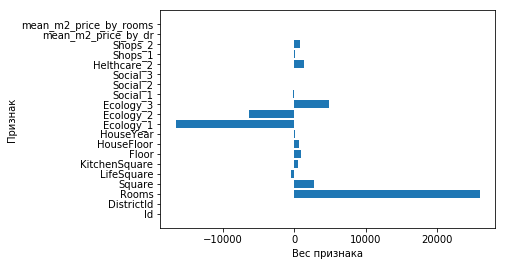

In [87]:
plt.barh(x_train.columns, lr.coef_.flatten())
plt.xlabel('Вес признака')
plt.ylabel('Признак')


Text(0, 0.5, 'Признак')

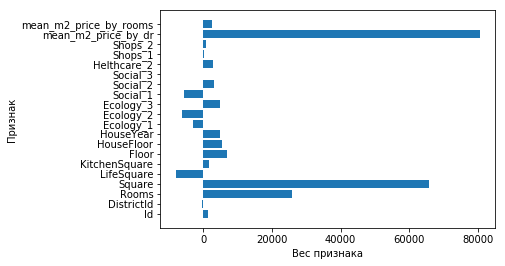

In [88]:
plt.barh(x_train_scaled.columns, lr_std.coef_.flatten())
plt.xlabel('Вес признака')
plt.ylabel('Признак')

### Линейная реграессия по выборочному набору признаков

In [89]:
feats_basic = ['Square', 'DistrictId', 'Floor', 'Social_1', 'Ecology_2']
feats_test = ['Square', 'Rooms', 'DistrictId', 'Floor','HouseYear',  'Social_1', 'Social_2','Ecology_1','Ecology_2','Ecology_3', 'Shops_2', 'Helthcare_2', 'mean_m2_price_by_dr']
feats = feats_test

In [90]:
lr_partial = LinearRegression()

In [91]:
lr_partial.fit(x_train_scaled.loc[:, feats_test], y_train)
print(lr_partial.score(x_train_scaled.loc[:,feats_test], y_train))
y_pred_partial = lr_partial.predict(x_test_scaled.loc[:, feats_test])
print(r2_score(y_test, y_pred_partial))

0.6884731240894939
0.741651265618899


Text(0, 0.5, 'Признак')

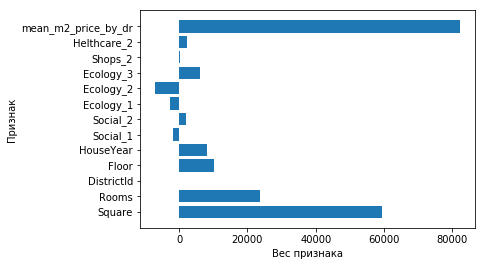

In [92]:
plt.barh(x_train_scaled.loc[:,feats_test].columns, lr_partial.coef_.flatten())
plt.xlabel('Вес признака')
plt.ylabel('Признак')

### Применение метода Random Forest

In [93]:
from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn.metrics import r2_score as r2
from  sklearn.ensemble import RandomForestRegressor as RFR

#### Поиск параметров модели

In [94]:
def evaluate_model (model, train, test, metric, feats, target, max_depth):
    md = model(max_depth = max_depth)
    md.fit( train.loc[:,feats], train[target])
    y_pred_train = md.predict (train.loc[:,feats])
    y_pred_test = md.predict(test.loc[:,feats])
    metric_train = metric(train[target],y_pred_train )
    metric_test = metric(test[target],y_pred_test )
    return metric_train, metric_test

In [95]:
def search_params (min_val, max_val, model, train, test, metric, feats, target):
    max_depth_arr = []
    metric_train_err = []
    metric_test_err = []
    for i in range (min_val, max_val):
        res = evaluate_model(model, train, test, metric, feats, target, max_depth = i)
        max_depth_arr.append(i)
        metric_train_err.append(res[0])
        metric_test_err.append(res[1])
    return max_depth_arr, metric_train_err, metric_test_err


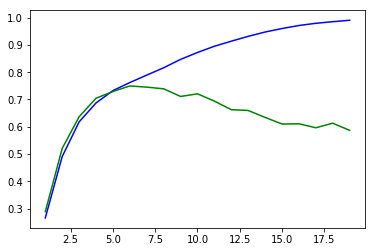

In [96]:
max_depth_arr, metric_train_err, metric_test_err = search_params(1, 20, DTR, x_train_scaledR, x_test_scaledR, r2, feats, 'Price' )
plt.plot(max_depth_arr, metric_train_err,color = "blue")
plt.plot(max_depth_arr, metric_test_err, color = "green")

In [97]:
print(max_depth_arr, metric_test_err)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19] [0.2890451262757613, 0.5206326060111264, 0.6365663469648186, 0.7045312500078277, 0.7292292663151163, 0.7495657052732314, 0.7452856757069948, 0.7391098155636964, 0.7110819976327697, 0.720692451131304, 0.6939960058408655, 0.6626932418113785, 0.6597527805664875, 0.6343585453310818, 0.6101505403844389, 0.6108906483484857, 0.596357903995836, 0.6131300416015972, 0.58689813977053]


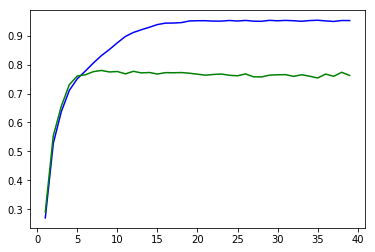

In [98]:
max_depth_arr, metric_train_err, metric_test_err = search_params(1, 40, RFR, x_train_scaledR, x_test_scaledR, r2, feats, 'Price' )
plt.plot(max_depth_arr, metric_train_err,color = "blue")
plt.plot(max_depth_arr, metric_test_err, color = "green")

In [99]:
#print((max_depth_arr, metric_test_err))
max_r2= np.max(metric_test_err)
i=0
max_depth = 0
while i<len(metric_test_err):
    if metric_test_err[i] ==max_r2:
        max_depth =  i
    i+=1
print ("Глубина", max_depth,"дает R2 =", max_r2)

Глубина 7 дает R2 = 0.7796300351617496


### Построение прогноза

In [100]:
model = RFR(max_depth = max_depth)

In [101]:
checktest = pd.read_csv('test.csv')

In [102]:
checktest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
Id               5000 non-null int64
DistrictId       5000 non-null int64
Rooms            5000 non-null float64
Square           5000 non-null float64
LifeSquare       3959 non-null float64
KitchenSquare    5000 non-null float64
Floor            5000 non-null int64
HouseFloor       5000 non-null float64
HouseYear        5000 non-null int64
Ecology_1        5000 non-null float64
Ecology_2        5000 non-null object
Ecology_3        5000 non-null object
Social_1         5000 non-null int64
Social_2         5000 non-null int64
Social_3         5000 non-null int64
Healthcare_1     2623 non-null float64
Helthcare_2      5000 non-null int64
Shops_1          5000 non-null int64
Shops_2          5000 non-null object
dtypes: float64(7), int64(9), object(3)
memory usage: 742.3+ KB


In [103]:
checktest.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1
count,5000.000000,5000.000000,5000.000000,5000.000000,3959.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,2623.000000,5000.00000,5000.000000
mean,8412.595400,51.279200,1.910000,56.449500,36.158810,5.976800,8.632000,12.601000,1984.392600,0.119874,24.933800,5406.900000,8.262600,1146.657263,1.31940,4.242800
std,4832.674037,44.179466,0.838594,19.092787,17.825287,9.950018,5.483228,6.789213,18.573149,0.120070,17.532202,4026.614773,23.863762,1044.744231,1.47994,4.777365
min,1.000000,0.000000,0.000000,1.378543,0.333490,0.000000,1.000000,0.000000,1908.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.00000,0.000000
25%,4221.750000,21.000000,1.000000,41.906231,23.092026,1.000000,4.000000,9.000000,1973.000000,0.019509,6.000000,1564.000000,0.000000,325.000000,0.00000,1.000000
50%,8320.500000,37.000000,2.000000,52.921340,32.925087,6.000000,7.000000,12.000000,1977.000000,0.072158,25.000000,5285.000000,2.000000,900.000000,1.00000,3.000000
75%,12598.250000,77.000000,2.000000,66.285129,45.174091,9.000000,12.000000,17.000000,2000.000000,0.195781,36.000000,7287.000000,5.000000,1548.000000,2.00000,6.000000
max,16795.000000,212.000000,17.000000,223.453689,303.071094,620.000000,78.000000,99.000000,2020.000000,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.00000,23.000000


In [104]:
checktest = data_processing(checktest)

In [105]:
checktest.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,mean_m2_price_by_dr,mean_m2_price_by_rooms
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,4995.000000
mean,8412.595400,51.279200,1.910000,56.449500,41.356588,7.535286,8.632000,12.601000,1984.392600,0.119874,0.009600,0.029800,24.933800,5406.900000,8.262600,1.31940,4.242800,0.082400,3910.398790,3900.697409
std,4832.674037,44.179466,0.838594,19.092787,19.445571,9.401729,5.483228,6.789213,18.573149,0.120070,0.097518,0.170052,17.532202,4026.614773,23.863762,1.47994,4.777365,0.275001,969.678431,59.870390
min,1.000000,0.000000,0.000000,1.378543,-3.249661,0.000000,1.000000,0.000000,1908.000000,0.000000,0.000000,0.000000,0.000000,168.000000,0.000000,0.00000,0.000000,0.000000,1016.753916,3449.119724
25%,4221.750000,21.000000,1.000000,41.906231,27.232598,5.307518,4.000000,9.000000,1973.000000,0.019509,0.000000,0.000000,6.000000,1564.000000,0.000000,0.00000,1.000000,0.000000,3025.145750,3889.431711
50%,8320.500000,37.000000,2.000000,52.921340,37.227434,6.538672,7.000000,12.000000,1977.000000,0.072158,0.000000,0.000000,25.000000,5285.000000,2.000000,1.00000,3.000000,0.000000,3999.157403,3889.431711
75%,12598.250000,77.000000,2.000000,66.285129,50.446773,9.000000,12.000000,17.000000,2000.000000,0.195781,0.000000,0.000000,36.000000,7287.000000,5.000000,2.00000,6.000000,0.000000,4559.856178,3961.195815
max,16795.000000,212.000000,17.000000,223.453689,162.325901,620.000000,78.000000,99.000000,2020.000000,0.521867,1.000000,1.000000,74.000000,19083.000000,141.000000,6.00000,23.000000,1.000000,8815.344841,4040.865243


In [106]:
x_final_scaled, checktest_final_scaled = scale_robust(x.loc[:, feats], checktest.loc[:, feats])

In [107]:
model.fit(x_final_scaled.loc[:, feats], x['Price'])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=7,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [108]:
model.feature_importances_

array([5.22603194e-01, 1.09294033e-02, 5.95690623e-03, 5.44004678e-03,
       8.11028364e-03, 1.32563693e-02, 8.15016210e-03, 5.43741319e-03,
       2.14434969e-04, 1.37411641e-04, 6.14496424e-04, 2.19843572e-03,
       4.16951443e-01])

In [109]:
checktest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 20 columns):
Id                        5000 non-null float64
DistrictId                5000 non-null float64
Rooms                     5000 non-null float64
Square                    5000 non-null float64
LifeSquare                5000 non-null float64
KitchenSquare             5000 non-null float64
Floor                     5000 non-null float64
HouseFloor                5000 non-null float64
HouseYear                 5000 non-null float64
Ecology_1                 5000 non-null float64
Ecology_2                 5000 non-null int64
Ecology_3                 5000 non-null int64
Social_1                  5000 non-null float64
Social_2                  5000 non-null float64
Social_3                  5000 non-null float64
Helthcare_2               5000 non-null float64
Shops_1                   5000 non-null float64
Shops_2                   5000 non-null int64
mean_m2_price_by_dr       5000 non-

In [110]:
checktest['Price'] = model.predict(checktest_final_scaled.loc[:,feats]) 

In [111]:
checktest.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,mean_m2_price_by_dr,mean_m2_price_by_rooms,Price
0,725.0,58.0,2.0,49.882643,33.432782,6.000000,6.0,14.0,1972.0,0.310199,...,0,11.0,2748.0,1.0,0.0,0.0,0,2962.604453,3889.431711,149930.833363
1,15856.0,74.0,2.0,69.263183,68.263183,6.150246,6.0,1.0,1977.0,0.075779,...,0,6.0,1437.0,3.0,0.0,2.0,0,3289.878362,3889.431711,214462.466704
2,5480.0,190.0,1.0,13.597819,1.597819,12.000000,2.0,5.0,1909.0,0.000000,...,0,30.0,7538.0,87.0,5.0,5.0,0,3961.195815,3961.195815,110766.573623
3,15664.0,47.0,2.0,73.046609,51.940842,9.000000,22.0,22.0,2007.0,0.101872,...,0,23.0,4583.0,3.0,3.0,3.0,0,3841.195532,3889.431711,294720.275586
4,14275.0,27.0,1.0,47.527111,43.387569,5.307518,17.0,17.0,2017.0,0.072158,...,0,2.0,629.0,1.0,0.0,0.0,1,2892.009138,3961.195815,132957.272383


In [112]:
checktest.loc[:, ['Id', 'Price']].to_csv('ESlivko_predictions.csv',index = None)

In [113]:
x.to_csv('data_adj.csv',index=None)